In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score


np.random.seed(1)

In [7]:
# read data
df = pd.read_csv('../../data/poverty_census_data.csv')
df.describe()

,SSL SCORE,PREDICTOR RAT VICTIM SHOOTING INCIDENTS,PREDICTOR RAT VICTIM BATTERY OR ASSAULT,PREDICTOR RAT ARRESTS VIOLENT OFFENSES,PREDICTOR RAT GANG AFFILIATION,PREDICTOR RAT NARCOTIC ARRESTS,PREDICTOR RAT TREND IN CRIMINAL ACTIVITY,PREDICTOR RAT UUW ARRESTS,PREDICTOR RAT AGE AT LATEST ARREST_20-30,PREDICTOR RAT AGE AT LATEST ARREST_30-40,PREDICTOR RAT AGE AT LATEST ARREST_40-50,PREDICTOR RAT AGE AT LATEST ARREST_50-60,PREDICTOR RAT AGE AT LATEST ARREST_60-70,PREDICTOR RAT AGE AT LATEST ARREST_70-80,PREDICTOR RAT AGE AT LATEST ARREST_less than 20,Poverty_Rate
count,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000,223839.000000
mean,0.722957,0.032573,0.056357,0.156005,0.258463,0.481784,-0.067300,0.047297,0.342930,0.209338,0.145421,0.094599,0.020327,0.002225,0.185160,29.924888
std,0.447539,0.193414,0.262757,0.468660,0.437790,1.005172,0.447049,0.228805,0.474689,0.406837,0.352526,0.292661,0.141117,0.047116,0.388428,14.925837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217865
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.720047
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.943850
75%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.584362
max,1.000000,4.000000,10.000000,12.000000,1.000000,27.000000,7.300000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [8]:
# Labels are the values we want to predict
labels = np.array(df['SSL SCORE']) # Y
df = df.drop('SSL SCORE', axis = 1)
x_list = list(df.columns) # X
# Convert to numpy array
df = np.array(df)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size = 0.25, random_state = 42)

# Linear Support Vector Machine

In [10]:
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Text(0.5, 427.9555555555555, 'Predicted label')

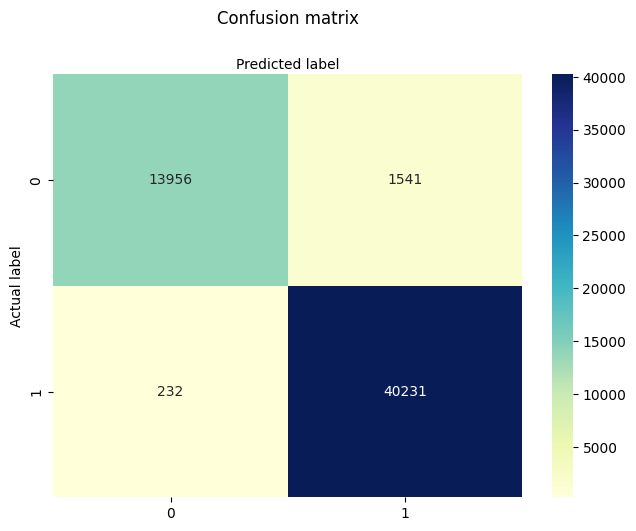

In [11]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
target_names = ['LOW SSL SCORE', 'HIGH SSL SCORE']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

 LOW SSL SCORE       0.98      0.90      0.94     15497
HIGH SSL SCORE       0.96      0.99      0.98     40463

      accuracy                           0.97     55960
     macro avg       0.97      0.95      0.96     55960
  weighted avg       0.97      0.97      0.97     55960



In [13]:
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred))

Accuracy: 0.9683
Precision: 0.9631
Recall: 0.9943
F1 Score: 0.9784


# RBF Support Vector Machine

In [14]:
clf = svm.SVC(kernel='rbf') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Text(0.5, 427.9555555555555, 'Predicted label')

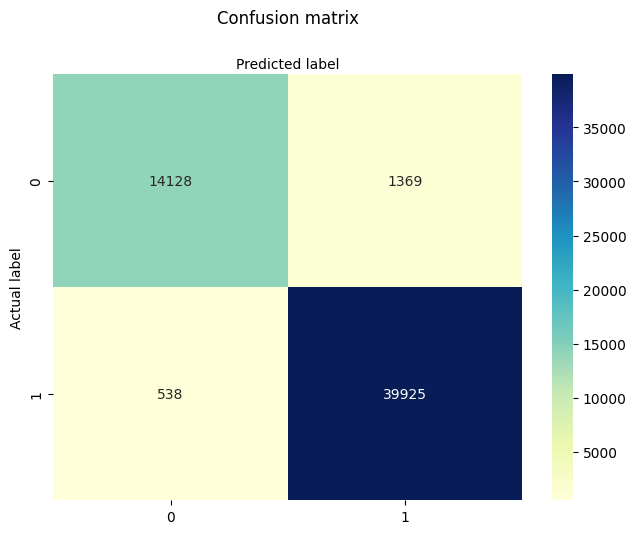

In [15]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
target_names = ['LOW SSL SCORE', 'HIGH SSL SCORE']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

 LOW SSL SCORE       0.96      0.91      0.94     15497
HIGH SSL SCORE       0.97      0.99      0.98     40463

      accuracy                           0.97     55960
     macro avg       0.97      0.95      0.96     55960
  weighted avg       0.97      0.97      0.97     55960



In [17]:
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred))

Accuracy: 0.9659
Precision: 0.9668
Recall: 0.9867
F1 Score: 0.9767
